In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df_1 = pd.read_csv('50_Startups.csv')
df_1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df_1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df_1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df_1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


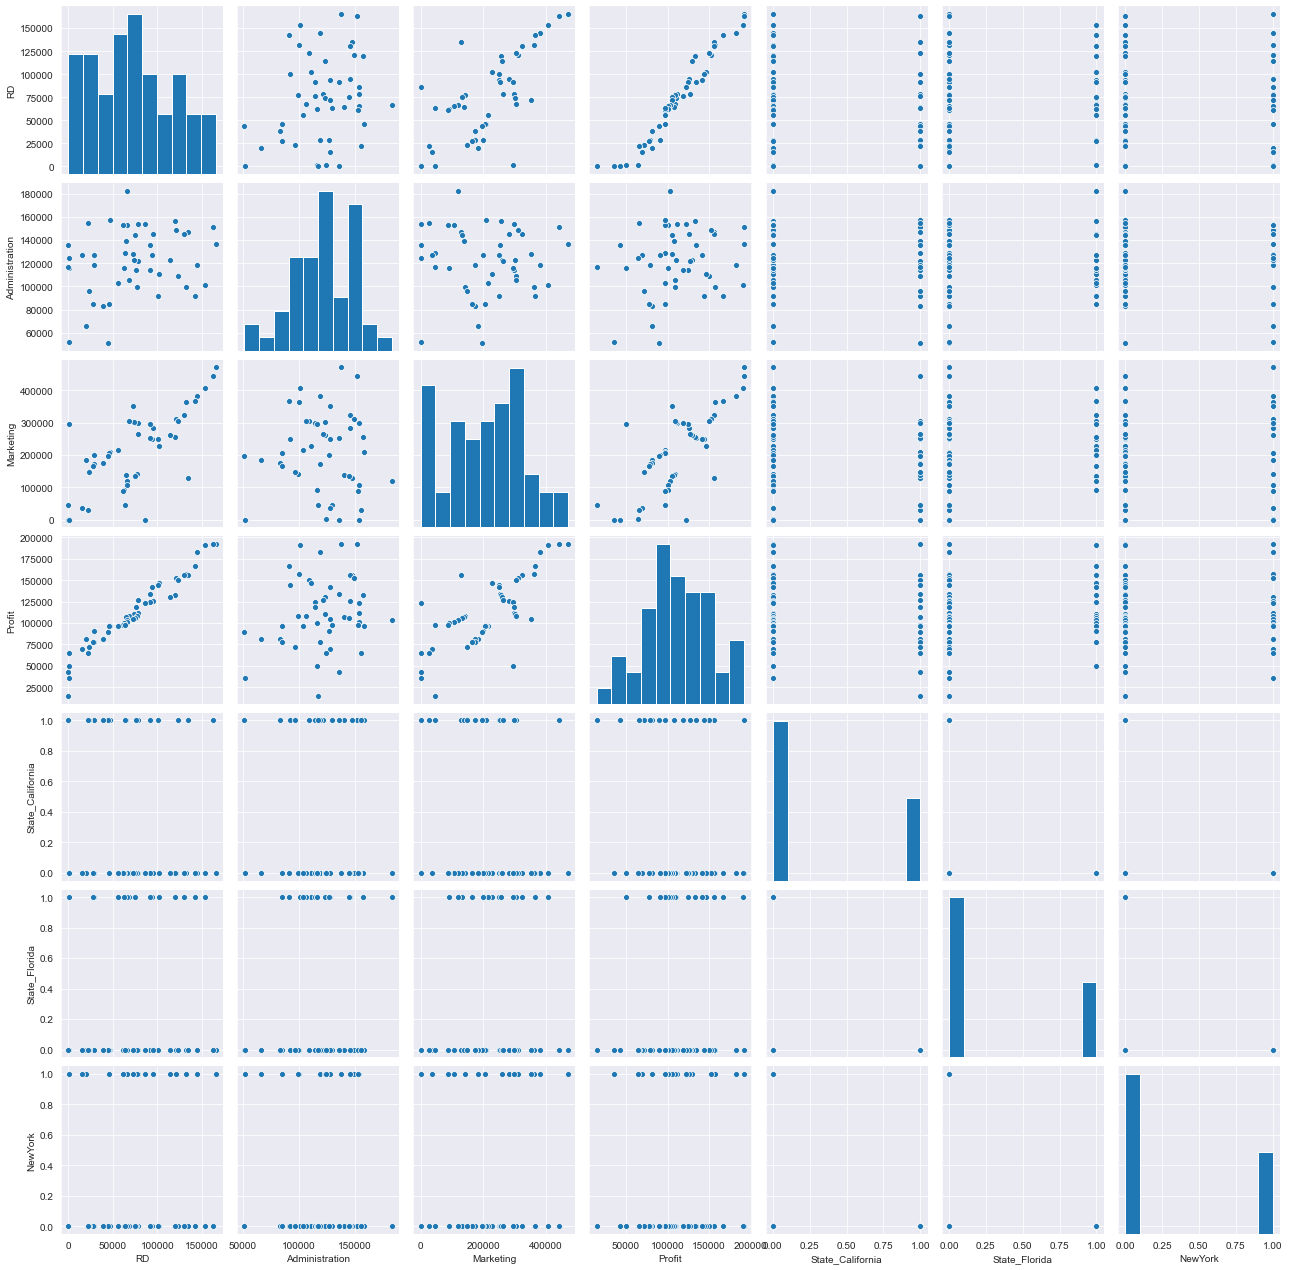

In [54]:
sns.set_style(style='darkgrid')
sns.pairplot(df_1);

In [8]:
df_1 = pd.get_dummies(df_1, columns=['State'])
df_1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


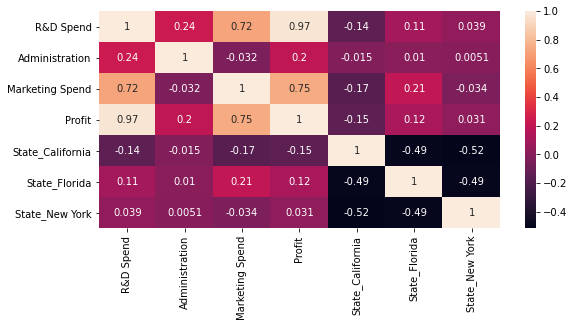

In [9]:
plt.figure(figsize=(9,4))
sns.heatmap(df_1.corr(),annot = True);

In [10]:
df_1.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [11]:
df_1.rename(columns={'Marketing Spend':'Marketing'},inplace=True)
df_1.rename(columns={'R&D Spend':'RD'},inplace=True)
df_1.rename(columns={'State_New York':'NewYork'},inplace=True)

In [12]:
std = StandardScaler()
df_1_std = std.fit_transform(df_1)
df_1_std = pd.DataFrame(df_1_std, columns=df_1.columns)

In [13]:
df_1_std.head()

,RD,Administration,Marketing,Profit,State_California,State_Florida,NewYork
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


In [14]:
model = smf.ols('Profit~RD+Administration+Marketing+State_California+State_Florida+NewYork',data = df_1_std).fit()

In [15]:
model.params

Intercept          -5.204170e-16
RD                  9.179307e-01
Administration     -1.877136e-02
Marketing           8.185781e-02
State_California   -6.031706e-04
State_Florida       1.730042e-03
NewYork            -1.100457e-03
dtype: float64

In [16]:
print(model.tvalues, '\n', model.pvalues)

Intercept          -1.555556e-14
RD                  1.736858e+01
Administration     -5.170116e-01
Marketing           1.573889e+00
State_California   -2.676515e-02
State_Florida       7.490466e-02
NewYork            -4.931619e-02
dtype: float64 
 Intercept           1.000000e+00
RD                  2.578772e-21
Administration      6.077373e-01
Marketing           1.226769e-01
State_California    9.787681e-01
State_Florida       9.406301e-01
NewYork             9.608905e-01
dtype: float64


In [17]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           1.34e-27
Time:                        18:13:08   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RD                   0.9179      0.053     17.369      0.000       0.811       1.024
Administration      -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing            0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
State_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
NewYork             -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.21e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
model_ad = smf.ols('Profit~Administration',data = df_1_std).fit()

In [20]:
model_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 14 Apr 2021   Prob (F-statistic):              0.162
Time:                        18:13:09   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.141  -3.68e-15      1.000      -0.284       0.284
Administration     0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model_mkt = smf.ols('Profit~Marketing',data = df_1_std).fit()

In [22]:
model_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           4.38e-10
Time:                        18:13:09   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.096  -5.43e-15      1.000      -0.193       0.193
Marketing      0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model_rd = smf.ols('Profit~RD',data = df_1_std).fit()

In [24]:
model_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           3.50e-32
Time:                        18:13:09   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RD             0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model_sc = smf.ols('Profit~State_California',data=df_1_std).fit()

In [43]:
model_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Wed, 14 Apr 2021   Prob (F-statistic):              0.312
Time:                        18:58:19   Log-Likelihood:                -70.409
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.204e-16      0.143  -3.64e-15      1.000      -0.287       0.287
State_California    -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model_sf = smf.ols('Profit~State_Florida',data=df_1_std).fit()

In [28]:
model_sf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Wed, 14 Apr 2021   Prob (F-statistic):              0.421
Time:                        18:17:18   Log-Likelihood:                -70.607
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.204e-16      0.143  -3.63e-15      1.000      -0.288       0.288
State_Florida     0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model_ny = smf.ols('Profit~NewYork',data=df_1_std).fit()

In [31]:
model_ny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Wed, 14 Apr 2021   Prob (F-statistic):              0.829
Time:                        18:19:05   Log-Likelihood:                -70.922
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.144  -3.61e-15      1.000      -0.290       0.290
NewYork        0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
rsq_rd = smf.ols('RD~Administration+Marketing+State_California+State_Florida+NewYork',data=df_1_std).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_ad = smf.ols('Administration~RD+Marketing+State_California+State_Florida+NewYork',data=df_1_std).fit().rsquared  
vif_ad = 1/(1-rsq_ad)

rsq_mkt = smf.ols('Marketing~RD+Administration+State_California+State_Florida+NewYork',data=df_1_std).fit().rsquared  
vif_mkt = 1/(1-rsq_mkt)

rsq_sc = smf.ols('State_California~RD+Administration+Marketing+State_Florida+NewYork',data=df_1_std).fit().rsquared  
vif_sc = 1/(1-rsq_sc)

rsq_sf = smf.ols('State_Florida~RD+Administration+Marketing+State_California+State_Florida+NewYork',data=df_1_std).fit().rsquared  
vif_sf = 1/(1-rsq_sf)

rsq_ny = smf.ols('NewYork~RD+Administration+Marketing+State_California+State_Florida',data=df_1_std).fit().rsquared  
vif_ny = 1/(1-rsq_ny)

data = {'Features':['RD','Administration','Marketing','State_California','State_Florida','NewYork'],'VIF':[vif_rd,vif_ad,vif_mkt,vif_sc,vif_sf,vif_ny]}
Vif_frame = pd.DataFrame(data)
Vif_frame

<ipython-input-47-96ee51b95354>:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sc = 1/(1-rsq_sc)
<ipython-input-47-96ee51b95354>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sf = 1/(1-rsq_sf)
<ipython-input-47-96ee51b95354>:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_ny = 1/(1-rsq_ny)


,Features,VIF
0,RD,2.495511
1,Administration,1.177766
2,Marketing,2.416797
3,State_California,inf
4,State_Florida,inf
5,NewYork,inf


In [48]:
model_Rd_M = smf.ols('Profit~RD+Marketing',data = df_1_std).fit()

In [49]:
model_Rd_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.16e-31
Time:                        19:01:47   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.032   -1.6e-14      1.000      -0.065       0.065
RD             0.9072      0.047     19.266      0.000       0.812       1.002
Marketing      0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
(model_mkt.rsquared,model_mkt.aic)

(0.5591535746115515, 104.94091802371327)

In [51]:
(model_rd.rsquared,model_rd.aic)

(0.9465353160804392, -0.5428445147422991)

In [52]:
(model_rd.rsquared,model_rd.rsquared_adj)

(0.9465353160804392, 0.9454214684987816)

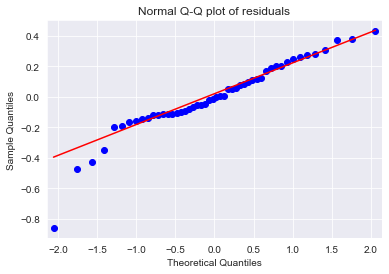

In [55]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_rd.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [56]:
list(np.where(model_rd.resid<-0.8))

[array([49], dtype=int64)]

In [57]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

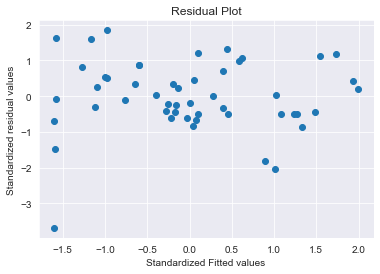

In [58]:
plt.scatter(get_standardized_values(model_rd.fittedvalues),get_standardized_values(model_rd.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

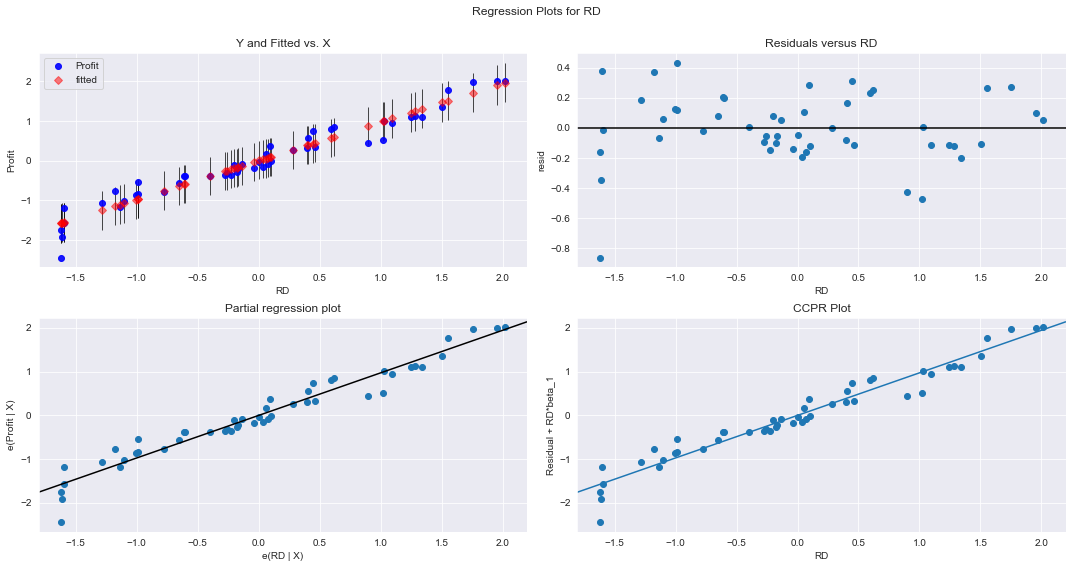

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_rd, "RD", fig=fig)
plt.show()

In [61]:
model_influence = model_rd.get_influence()
(c, _) = model_influence.cooks_distance

In [62]:
(np.argmax(c),np.max(c))

(49, 0.562061025926428)

In [63]:
df_1=df_1_std.drop(df_1_std.index[[49]],axis=0).reset_index()

In [65]:
df_1.shape

(49, 8)

In [66]:
df_1.head()

,index,RD,Administration,Marketing,Profit,State_California,State_Florida,NewYork
0,0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


In [67]:
final_model =smf.ols('Profit~RD',data = df_1).fit()

In [68]:
(final_model.rsquared,final_model.rsquared_adj)

(0.9573395972488337, 0.9564319291051918)

In [69]:
newdata=pd.DataFrame({'RD':100000},index=[1])

In [70]:
final_model.predict(newdata)

1    94277.81544
dtype: float64